The goal of this notebook is to understand more about visual signals on the eye,
with the ultimate goal being to figure out a more accurate way of measuring myopia and astigmatism.
Let's start with a simple review of waves, optics, and diffraction.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

C:\Users\scott\AppData\Local\Temp/ipykernel_7716/428600736.py:5: RuntimeWarning: divide by zero encountered in true_divide
  z = np.real(np.exp(1.j*k*r)) * np.minimum(10, 1/r)
C:\Users\scott\AppData\Local\Temp/ipykernel_7716/428600736.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, z)


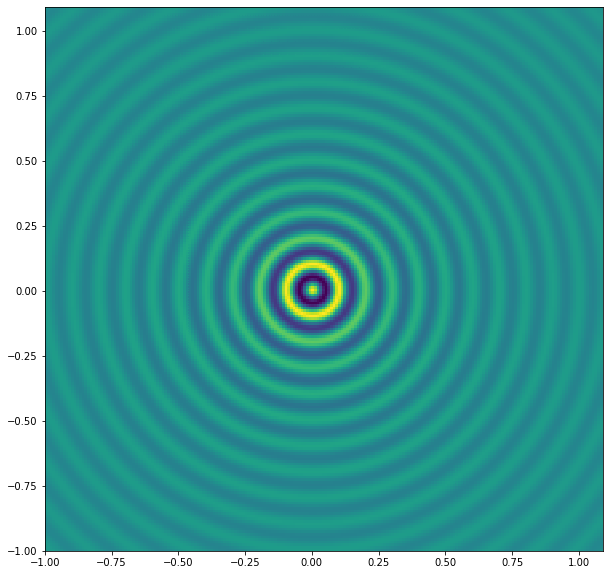

In [73]:
wavelength = 10
k = wavelength*2*np.pi
x,y = np.mgrid[-1:1.1:0.01, -1:1.1:0.01]
r = np.sqrt(x**2 + y**2)
z = np.real(np.exp(1.j*k*r)) * np.minimum(10, 1/r)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pcolormesh(x, y, z)

C:\Users\scott\AppData\Local\Temp/ipykernel_7716/3545978899.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[0].pcolormesh(x, y, np.real(z))
C:\Users\scott\AppData\Local\Temp/ipykernel_7716/3545978899.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2 = axs[1].pcolormesh(x, y, i, norm=colors.LogNorm(vmin=i.min(), vmax=i.max()))


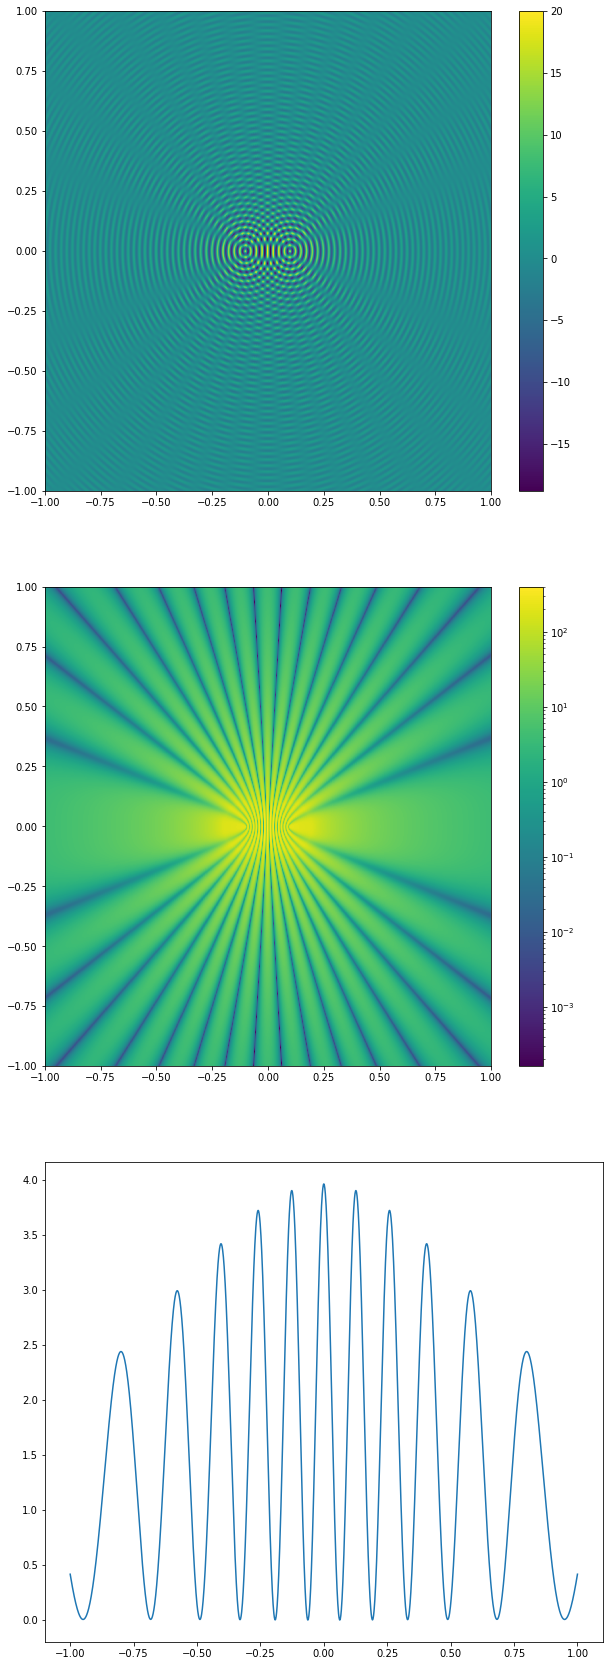

In [123]:
cutoff = 10
delta = 0.001
wavelength = 0.1
d = 0.1
n = 4
wavelength = d / n
k = 2*np.pi / wavelength
x,y = np.mgrid[-1:1+delta:delta, -1:1+delta:delta]
r1 = np.sqrt((x-d)**2 + y**2)
r2 = np.sqrt((x+d)**2+y**2)
z1 = np.exp(1.j*k*r1) * np.minimum(10, 1/r1)
z2 = np.exp(1.j*k*r2) * np.minimum(10, 1/r2)
z = z1+z2
i = np.real(z*np.conj(z))
fig, axs = plt.subplots(3, 1, figsize=(10, 30))
im1 = axs[0].pcolormesh(x, y, np.real(z))
im2 = axs[1].pcolormesh(x, y, i, norm=colors.LogNorm(vmin=i.min(), vmax=i.max()))
axs[2].plot(x[:,-1], i[:,-1])
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])